# **Predict Earthquake Damage to Building in Nepal (Part 2)**
## **Reynara Ezra Pratama**

## **Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## **Loading Dataset**

**Load Data From Github**

In [2]:
# url_train_label = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/train_labels.csv'
# url_train_value = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/train_values.csv'
# url_test_value = 'https://raw.githubusercontent.com/ReynaraEzra/Richter-Earthquake-Prediction/main/test_values.csv'

# train_label = pd.read_csv(url_train_label)
# train_value = pd.read_csv(url_train_value)
# test_value = pd.read_csv(url_test_value)

**Load Data From Local File**

In [3]:
train_label = pd.read_csv("train_labels.csv")
train_value = pd.read_csv("train_values.csv")
test_value = pd.read_csv("test_values.csv")

## **Data**

In [4]:
train = pd.merge(train_value, train_label)

In [5]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


## **Feature Selection**

In [6]:
corr_matrix = train.corr()
corr_matrix

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.000000,-0.002850,0.000347,-0.000393,-0.000654,-0.001476,-0.002070,0.000096,-0.000307,0.002423,...,0.001934,-0.002152,0.000706,-0.000362,0.002348,-0.000374,0.000538,-0.003116,-0.002295,0.001063
geo_level_1_id,-0.002850,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,...,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992,-0.072347
geo_level_2_id,0.000347,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,...,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068,0.043161
geo_level_3_id,-0.000393,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,...,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463,0.007932
count_floors_pre_eq,-0.000654,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,...,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073,0.122308
age,-0.001476,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,...,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534,0.029273
area_percentage,-0.002070,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.026287,-0.225541,...,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111,-0.125221
height_percentage,0.000096,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.149725,-0.106573,...,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397,0.048130
has_superstructure_adobe_mud,-0.000307,-0.018245,0.015833,-0.015732,0.174852,0.068032,0.026287,0.149725,1.000000,-0.306861,...,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074,0.055314
has_superstructure_mud_mortar_stone,0.002423,-0.152038,0.076491,0.026294,-0.027116,0.001321,-0.225541,-0.106573,-0.306861,1.000000,...,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628,0.291325


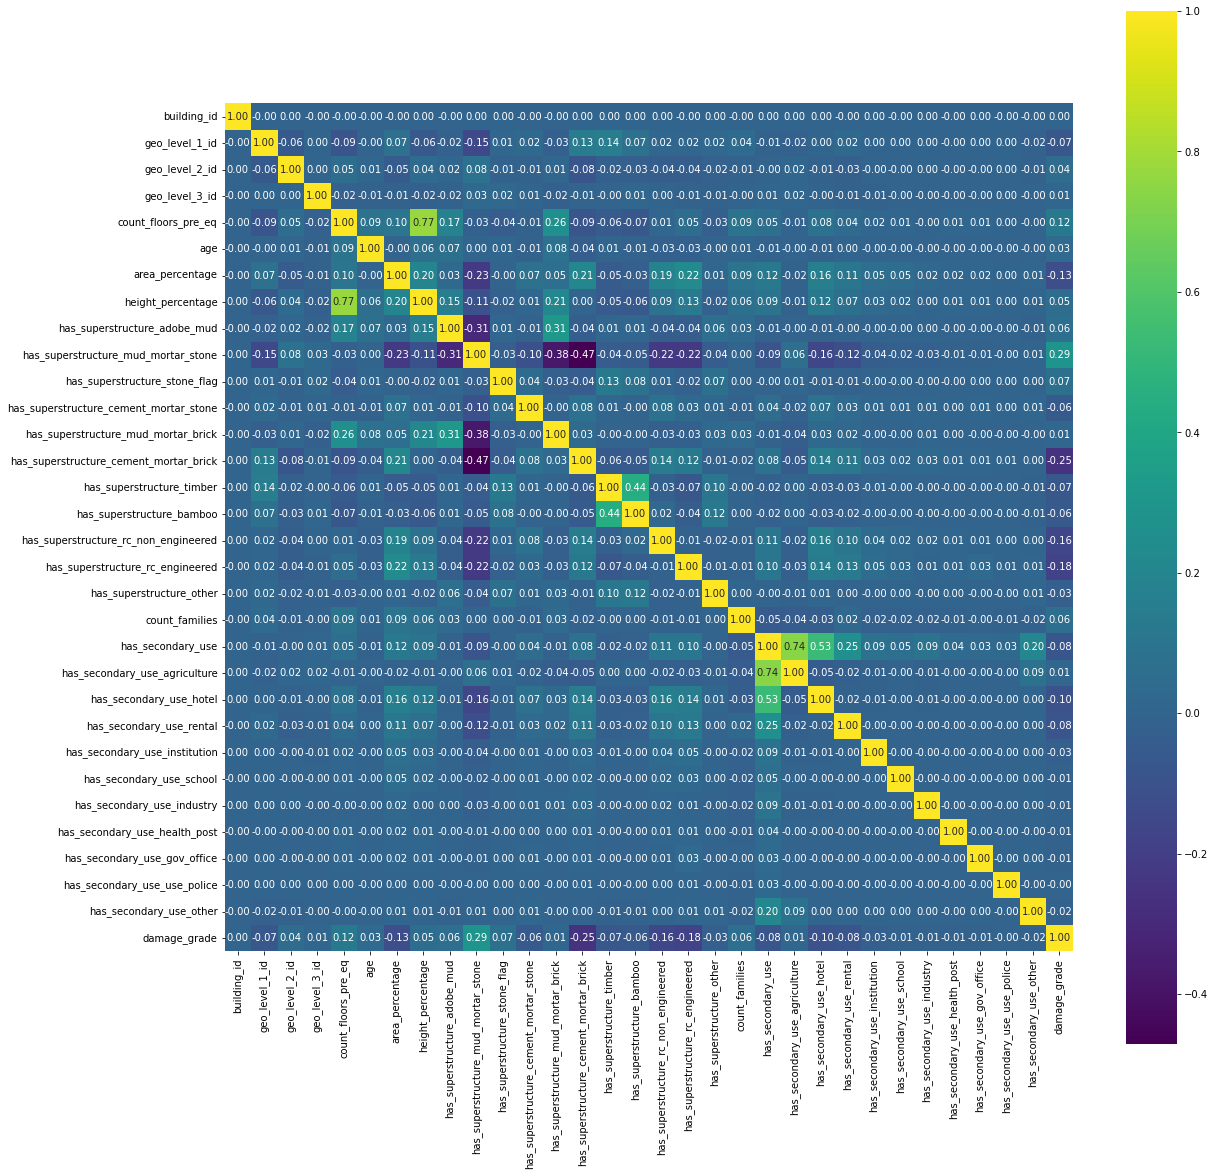

In [7]:
plt.figure(figsize=(19,19))

sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

Pada gambar di atas, terlihat terdapat feature yang mempunyai korelasi yang tinggi dengan feature lainnya. Feature ***height_percentage*** dan ***has_secondary_use_agriculture*** memiliki tingkat korelasi yang tinggi (> 0,7) dengan feature lain.

In [8]:
target_corr_matrix = corr_matrix['damage_grade'].drop('damage_grade').sort_values(ascending=False)
target_corr_matrix

has_superstructure_mud_mortar_stone       0.291325
count_floors_pre_eq                       0.122308
has_superstructure_stone_flag             0.066039
count_families                            0.056151
has_superstructure_adobe_mud              0.055314
height_percentage                         0.048130
geo_level_2_id                            0.043161
age                                       0.029273
has_superstructure_mud_mortar_brick       0.014561
has_secondary_use_agriculture             0.011309
geo_level_3_id                            0.007932
building_id                               0.001063
has_secondary_use_use_police             -0.001656
has_secondary_use_health_post            -0.008543
has_secondary_use_gov_office             -0.009378
has_secondary_use_industry               -0.011024
has_secondary_use_school                 -0.011692
has_secondary_use_other                  -0.016334
has_secondary_use_institution            -0.028728
has_superstructure_other       

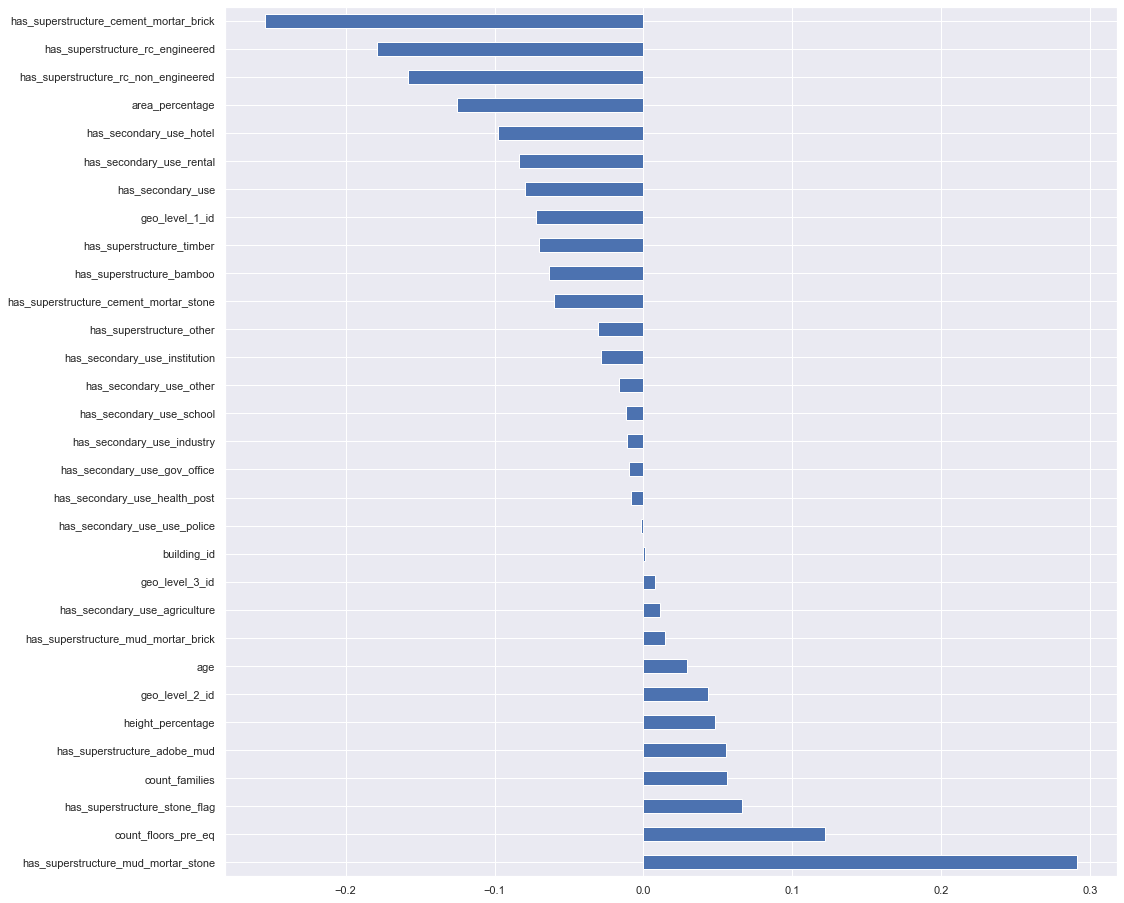

In [9]:
plt.figure(figsize=(16,16))
sns.set_theme()
target_corr_matrix.plot(kind='barh')
plt.show()

In [10]:
df = train.copy()
df = df.set_index('building_id')

**Pisahkan Feature Numerik dan Kategorikal**

In [11]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

**Feature Selection Untuk Feature Numerik**

Pada matrik korelasi sebelumnya terlihat bahwa terdapat dua buah feature yang memiliki tingkat korelasi yang tinggi (>0.7). Penggunakan matrik korelasi dapat dilakukan untuk mengecek multicollinearity. Multicollinearity dapat menimbulkan masalah seperti redudansi dimana dua feature tersebut dapat menyimpan informasi yang serupa/mirip. Dalam mengatasi multicollinearity, kita dapat membuang dua buah feature tersebut atau salah satu agar tidak ada feature yang mempunyai tingkat korelasi yang tinggi dengan feature lain. Akan dicek antara feature ***height_percentage*** dan ***has_secondary_use_agriculture*** yang mempunyai tingkat korelasi lebih tinggi terhadap target ***damage_grade***.

In [12]:
print('Korelasi feature height_percentange dengan damage_grade : {:.4f}'.format(target_corr_matrix['height_percentage']))
print('Korelasi feature has_secondary_use_agriculture dengan damage_grade : {:.4f}'.format(target_corr_matrix['has_secondary_use_agriculture']))

Korelasi feature height_percentange dengan damage_grade : 0.0481
Korelasi feature has_secondary_use_agriculture dengan damage_grade : 0.0113


Berdasarkan nilai korelasi di atas, terlihat bahwa feature ***height_percentage*** mempunyai tingkat korelasi yang lebih tinggi, maka kita akan membuang feature ***has_secondary_use_agriculture***.

In [13]:
df_num.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,0,3


In [14]:
df_num = df_num.drop('has_secondary_use_agriculture', axis=1)

In [15]:
df_num.shape

(260601, 30)

**Feature Selection Untuk Feature Kategorikal**

Proses pemilihan feature yang bertipe kategorikal akan menggunakan *SelectKBest*. Menggunakan hal ini, digunakan metrics *chi squared* yang mana jika *chi squared* semakin tinggi, maka semakin signifikan pengaruh dari feature tersebut.

In [16]:
df_cat.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
building_id,,,,,,,,
802906,t,r,n,f,q,t,d,v
28830,o,r,n,x,q,s,d,v
94947,t,r,n,f,x,t,d,v
590882,t,r,n,f,x,s,d,v
201944,t,r,n,f,x,s,d,v


In [17]:
df_cat = pd.get_dummies(df_cat)

In [18]:
df_cat.head()

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
df_cat.shape

(260601, 38)

In [20]:
category_rank_feature = SelectKBest(score_func=chi2, k=38)
rank_feature = category_rank_feature.fit(df_cat, df_num['damage_grade'])
rank_feature.scores_

array([3.14202700e+02, 6.77046429e+01, 6.77640172e+01, 4.15860728e+02,
       2.79293047e+04, 6.39195232e+03, 5.49424844e+03, 8.31579458e+03,
       1.04584801e+03, 1.15697625e+03, 2.80485950e+04, 3.68489235e+03,
       9.75543604e+01, 3.24654211e+04, 6.05516649e+01, 1.22429528e+02,
       7.42291993e+03, 5.10846128e+03, 1.85494082e+04, 4.06602490e+02,
       2.59354872e+02, 1.48779877e+02, 4.93714399e+01, 6.22421247e+02,
       1.09200110e+02, 1.50572497e+02, 3.04753264e+01, 3.34305427e+00,
       1.36435198e+01, 1.65187836e+00, 5.72019260e+01, 3.23110604e+02,
       3.31565900e+01, 1.01176162e+03, 2.26362245e+03, 5.34417037e+01,
       3.96056239e+01, 2.29493063e+02])

In [21]:
cat_score = pd.DataFrame(rank_feature.scores_, columns=['Score'])
cat_col = pd.DataFrame(df_cat.columns, columns=['Feature'])
univariate_cat_rank = pd.concat([cat_col, cat_score], axis=1)
univariate_cat_rank.set_index('Feature', inplace=True)
sorted_univariate_cat_rank = univariate_cat_rank.sort_values('Score', ascending=False)
#sorted_univariate_cat_rank

In [22]:
chi2_greater100 = sorted_univariate_cat_rank[sorted_univariate_cat_rank['Score']>100]

**Merge Feature Numerik dan Kategorikal**

In [23]:
df_new = pd.concat([df_num, df_cat], axis=1)

In [24]:
df_new.sample(6)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,
671063,8,900,2402,3,50,8,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
334036,3,1387,10110,5,30,7,11,1,0,0,...,0,0,0,0,0,0,0,0,1,0
855327,21,30,672,2,10,6,4,0,1,0,...,0,0,0,0,0,0,0,0,1,0
71688,12,234,6185,2,80,7,4,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1026290,27,216,12323,2,10,4,5,1,0,0,...,0,0,0,0,0,0,0,0,0,1
981120,7,129,5248,2,5,9,4,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## **Split Data into Train Data and Validation Data**

Pisahkan data yang akan digunakan sebagai label atau target variabel dengan feature lainnya. Dalam kasus ini kita membuat variabel y yang menyimpan target variabel dan X yang menyimpan feature lainnya.

In [25]:
data = df_new.copy()
y = data['damage_grade']
X = data[list(df_num.columns)+list(chi2_greater100.index)]
X.drop('damage_grade', axis=1, inplace=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((208480, 54), (52121, 54), (208480,), (52121,))

In [27]:
X_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,foundation_type_h,other_floor_type_x,plan_configuration_q,land_surface_condition_n,position_j,legal_ownership_status_w,plan_configuration_c,position_o,ground_floor_type_z,plan_configuration_a
building_id,,,,,,,,,,,,,,,,,,,,,
882292,20,281,7097,2,15,6,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
193569,26,886,12157,2,10,6,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
898082,26,36,1125,1,0,5,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
136982,13,1372,4555,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
742018,8,206,6064,3,35,6,5,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
X_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,foundation_type_h,other_floor_type_x,plan_configuration_q,land_surface_condition_n,position_j,legal_ownership_status_w,plan_configuration_c,position_o,ground_floor_type_z,plan_configuration_a
building_id,,,,,,,,,,,,,,,,,,,,,
315409,6,449,484,2,0,9,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
838451,27,548,2513,2,0,5,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
808750,24,780,9035,3,25,4,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
322968,10,661,6346,3,30,6,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
212418,10,1207,276,2,15,5,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y_train.head().to_frame()

,damage_grade
building_id,
882292,1
193569,1
898082,1
136982,2
742018,3


In [30]:
y_test.head().to_frame()

,damage_grade
building_id,
315409,2
838451,3
808750,2
322968,2
212418,3


## **Scaling Feature**

Dalam tahapan *preprocessing* data, kita akan menerapkan StandardScaler untuk melakuka normalisasi pada data pada *scaled_col*

In [31]:
scaler = StandardScaler()

scaled_col = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 
              'count_floors_pre_eq', 'age', 'area_percentage', 
              'height_percentage']

X_train[scaled_col] = scaler.fit_transform(X_train[scaled_col])
X_test[scaled_col] = scaler.transform(X_test[scaled_col])

In [32]:
X_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,foundation_type_h,other_floor_type_x,plan_configuration_q,land_surface_condition_n,position_j,legal_ownership_status_w,plan_configuration_c,position_o,ground_floor_type_z,plan_configuration_a
building_id,,,,,,,,,,,,,,,,,,,,,
882292,0.758641,-1.019753,0.228478,-0.178354,-0.156363,-0.461464,0.817733,0,1,0,...,0,0,0,0,0,0,0,0,0,0
193569,1.505643,0.446238,1.615688,-0.178354,-0.224906,-0.461464,0.295711,0,0,0,...,0,0,0,0,0,0,0,0,0,0
898082,1.505643,-1.613419,-1.408759,-1.556477,-0.361991,-0.690498,-1.270355,0,0,0,...,0,0,0,1,0,0,0,0,0,0
136982,-0.112861,1.623877,-0.468417,-0.178354,-0.224906,-0.461464,-0.226311,0,1,0,...,0,0,0,0,0,0,0,0,0,0
742018,-0.735362,-1.201487,-0.054721,1.199770,0.117809,-0.461464,-0.226311,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
X_test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,foundation_type_h,other_floor_type_x,plan_configuration_q,land_surface_condition_n,position_j,legal_ownership_status_w,plan_configuration_c,position_o,ground_floor_type_z,plan_configuration_a
building_id,,,,,,,,,,,,,,,,,,,,,
315409,-0.984363,-0.612668,-1.584491,-0.178354,-0.361991,0.225640,1.339754,0,1,0,...,0,0,0,0,0,0,0,0,0,0
838451,1.630143,-0.372778,-1.028236,-0.178354,-0.361991,-0.690498,-0.226311,0,1,0,...,0,0,0,0,0,0,0,0,0,0
808750,1.256643,0.189387,0.759785,1.199770,-0.019277,-0.919532,0.817733,0,1,0,...,0,0,0,0,0,0,0,0,0,0
322968,-0.486362,-0.098965,0.022590,1.199770,0.049266,-0.461464,0.817733,0,1,0,...,0,0,0,0,0,0,0,0,0,0
212418,-0.486362,1.224061,-1.641514,-0.178354,-0.156363,-0.690498,-0.226311,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Building Model

**Confusion Matrix Function**

Definisikan fungsi untuk membuat *confusion matrix*

In [34]:
def make_confusion_matrix(pred, title):
    cam = confusion_matrix(y_test, pred)
    sns.heatmap(cam, annot=True, cmap='viridis', 
                xticklabels=['Low', 'Medium', 'High'],
                yticklabels=['Low', 'Medium', 'High'],
                fmt="d")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Using {} Algorithm'.format(title))
    plt.show()

# **Using Cross Validation**

Dalam membandingkan *performance* dari beberapa algoritma *machine learning* yang akan diuji, kita akan menggunakan metric **F1 Score Micro**. Adapun asalan digunakan **F1 Score** sebagai metric adalah kita ingin membuat suatu model machine learning yang dapat memaksimalkan nilai dari *Precision* dan *Recall* yang baik. Metric *Precision* dan *Recall* dianggap penting karena nilai FN(*False Negative*) dan FP(*False Positive*) adalah faktor penting. Selain itu, metric **F1 Score** dianggap lebih baik saat bekerja dengan kelas yang tidak seimbang. Untuk **Micro** sendiri dipilih dikarenakan kita ingin menghitung terlebih dahulu penjumlahan dari semua TP(*True Positive*), FP(*False Positive*), dan FN(*False Negative*) dari semua kelas pada target variabel.

## **Logistic Regression**

In [35]:
model_cv_1 = LogisticRegression(random_state=0)
kfold = KFold(n_splits=10)
scores_1 = cross_val_score(model_cv_1, X_train, y_train, scoring="f1_micro", cv=kfold)
result_1 = scores_1.mean()
print('Average F1 Score (Micro) for Logistic Algorithm is : {}'.format(result_1))

Average F1 Score (Micro) for Logistic Algorithm is : 0.5910878741366077


## **Decision Tree**

In [37]:
model_cv_2 = DecisionTreeClassifier(random_state=0)
kfold = KFold(n_splits=10)
scores_2 = cross_val_score(model_cv_2, X_train, y_train, scoring="f1_micro", cv=kfold)
result_2 = scores_2.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_2))

Average F1 Score (Micro) for Decision Tree is : 0.6576026477359939


## **K-Nearest Neighbors**

In [59]:
model_cv_3 = KNeighborsClassifier()
kfold = KFold(n_splits=10)
scores_3 = cross_val_score(model_cv_3, X_train, y_train, scoring="f1_micro", cv=kfold)
result_3 = scores_3.mean()
print('Average F1 Score (Micro) for K-Nearest Neighbors is : {}'.format(result_3))

Average F1 Score (Micro) for K-Nearest Neighbors is : 0.655962202609363


## **Linear Discriminant Analysis**

In [41]:
model_cv_4 = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=10)
scores_4 = cross_val_score(model_cv_4, X_train, y_train, scoring="f1_micro", cv=kfold)
result_4 = scores_4.mean()
print('Average F1 Score (Micro) for Linear Discriminant Analysis is : {}'.format(result_4))

Average F1 Score (Micro) for Linear Discriminant Analysis is : 0.5867661166538757


## **Naive Bayes**

In [45]:
model_cv_5 = GaussianNB()
kfold = KFold(n_splits=10)
scores_5 = cross_val_score(model_cv_5, X_train, y_train, scoring="f1_micro", cv=kfold)
result_5 = scores_5.mean()
print('Average F1 Score (Micro) for Naive Bayes is : {}'.format(result_5))

Average F1 Score (Micro) for Naive Bayes is : 0.430962202609363


## **Extreme Gradient Boosting**

In [49]:
model_cv_6 = XGBClassifier(verbosity=0)
kfold = KFold(n_splits=10)
scores_6 = cross_val_score(model_cv_6, X_train, y_train, scoring="f1_micro", cv=kfold)
result_6 = scores_6.mean()
print('Average F1 Score (Micro) for Extreme Gradient Boosting is : {}'.format(result_6))

Average F1 Score (Micro) for Extreme Gradient Boosting is : 0.7272831926323869


## **Random Forest**

In [50]:
model_cv_7 = RandomForestClassifier(random_state=0)
kfold = KFold(n_splits=10)
scores_7 = cross_val_score(model_cv_7, X_train, y_train, scoring="f1_micro", cv=kfold)
result_7 = scores_7.mean()
print('Average F1 Score (Micro) for Random Forest is : {}'.format(result_7))

Average F1 Score (Micro) for Random Forest is : 0.7145577513430544


# **Fit and Predict Several Algorithm**

## **Logistic Regression**

              precision    recall  f1-score   support

           1       0.57      0.30      0.39      4979
           2       0.60      0.88      0.71     29703
           3       0.56      0.20      0.29     17439

    accuracy                           0.59     52121
   macro avg       0.58      0.46      0.47     52121
weighted avg       0.58      0.59      0.54     52121



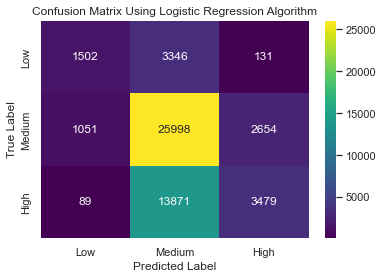

Train F1 Score (Micro) for Logistic Regression Algorithm is : 0.591514773599386
Test F1 Score (Micro) for Logistic Regression Algorithm is : 0.5943669538189981


In [53]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)
train_pred_1 = model_1.predict(X_train)

print(classification_report(y_test, pred_1))
make_confusion_matrix(pred_1, 'Logistic Regression')
train_score_1 = f1_score(y_train, train_pred_1, average='micro')
score_1 = f1_score(y_test, pred_1, average='micro')
print('Train F1 Score (Micro) for Logistic Regression Algorithm is : {}'.format(train_score_1))
print('Test F1 Score (Micro) for Logistic Regression Algorithm is : {}'.format(score_1))

## **Decision Tree**

              precision    recall  f1-score   support

           1       0.48      0.52      0.50      4979
           2       0.71      0.71      0.71     29703
           3       0.62      0.61      0.62     17439

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121



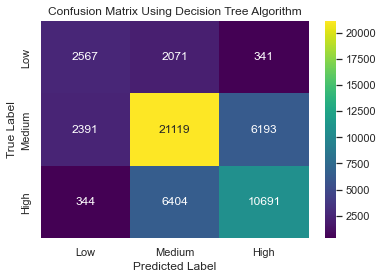

Train F1 Score (Micro) for Decision Tree Algorithm is : 0.9864207597851112
Test F1 Score (Micro) for Decision Tree Algorithm is : 0.6595614051917653


In [55]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)
train_pred_2 = model_2.predict(X_train)

print(classification_report(y_test, pred_2))
make_confusion_matrix(pred_2, 'Decision Tree')
train_score_2 = f1_score(y_train, train_pred_2, average='micro')
score_2 = f1_score(y_test, pred_2, average='micro')
print('Train F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(train_score_2))
print('Test F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(score_2))

## **K-Nearest Neighbors**

              precision    recall  f1-score   support

           1       0.52      0.46      0.49      4979
           2       0.69      0.75      0.72     29703
           3       0.63      0.56      0.59     17439

    accuracy                           0.66     52121
   macro avg       0.61      0.59      0.60     52121
weighted avg       0.65      0.66      0.66     52121



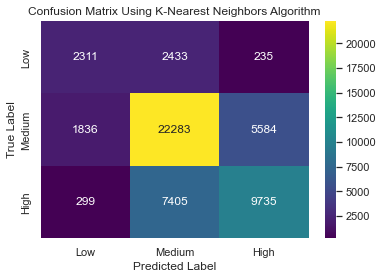

Train F1 Score (Micro) for K-Nearest Neighbors Algorithm is : 0.7662125863392172
Test F1 Score (Micro) for K-Nearest Neighbors Algorithm is : 0.65864047121122


In [56]:
model_3 = KNeighborsClassifier()
model_3.fit(X_train, y_train)
pred_3 = model_3.predict(X_test)
train_pred_3 = model_3.predict(X_train)

print(classification_report(y_test, pred_3))
make_confusion_matrix(pred_3, 'K-Nearest Neighbors')
train_score_3 = f1_score(y_train, train_pred_3, average='micro')
score_3 = f1_score(y_test, pred_3, average='micro')
print('Train F1 Score (Micro) for K-Nearest Neighbors Algorithm is : {}'.format(train_score_3))
print('Test F1 Score (Micro) for K-Nearest Neighbors Algorithm is : {}'.format(score_3))

## **Linear Discriminant Analysis**

              precision    recall  f1-score   support

           1       0.49      0.50      0.50      4979
           2       0.60      0.85      0.70     29703
           3       0.57      0.18      0.27     17439

    accuracy                           0.59     52121
   macro avg       0.55      0.51      0.49     52121
weighted avg       0.58      0.59      0.54     52121



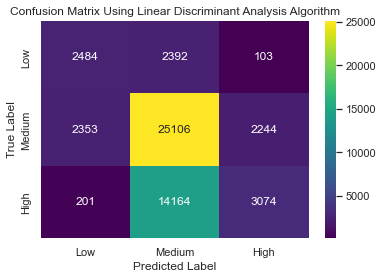

Train F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : 0.587212202609363
Test F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : 0.5883233245716698


In [57]:
model_4 = LinearDiscriminantAnalysis()
model_4.fit(X_train, y_train)
pred_4 = model_4.predict(X_test)
train_pred_4 = model_4.predict(X_train)

print(classification_report(y_test, pred_4))
make_confusion_matrix(pred_4, 'Linear Discriminant Analysis')
train_score_4 = f1_score(y_train, train_pred_4, average='micro')
score_4 = f1_score(y_test, pred_4, average='micro')
print('Train F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : {}'.format(train_score_4))
print('Test F1 Score (Micro) for Linear Discriminant Analysis Algorithm is : {}'.format(score_4))

## **Naive Bayes**

              precision    recall  f1-score   support

           1       0.39      0.52      0.45      4979
           2       0.66      0.15      0.25     29703
           3       0.40      0.88      0.55     17439

    accuracy                           0.43     52121
   macro avg       0.49      0.52      0.42     52121
weighted avg       0.55      0.43      0.37     52121



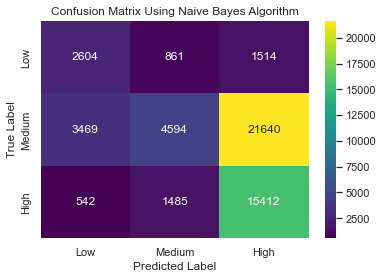

Train F1 Score (Micro) for Naive Bayes Algorithm is : 0.43118284727551803
Test F1 Score (Micro) for Naive Bayes Algorithm is : 0.4337982770860114


In [58]:
model_5 = GaussianNB()
model_5.fit(X_train, y_train)
pred_5 = model_5.predict(X_test)
train_pred_5 = model_5.predict(X_train)

print(classification_report(y_test, pred_5))
make_confusion_matrix(pred_5, 'Naive Bayes')
train_score_5 = f1_score(y_train, train_pred_5, average='micro')
score_5 = f1_score(y_test, pred_5, average='micro')
print('Train F1 Score (Micro) for Naive Bayes Algorithm is : {}'.format(train_score_5))
print('Test F1 Score (Micro) for Naive Bayes Algorithm is : {}'.format(score_5))

## **Extreme Gradient Boosting**

              precision    recall  f1-score   support

           1       0.69      0.45      0.54      4979
           2       0.72      0.86      0.78     29703
           3       0.75      0.58      0.66     17439

    accuracy                           0.73     52121
   macro avg       0.72      0.63      0.66     52121
weighted avg       0.73      0.73      0.72     52121



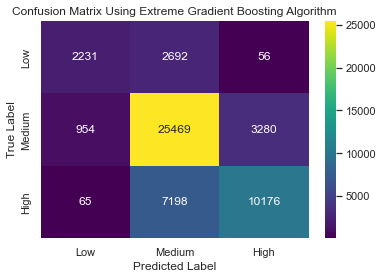

Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.7448196469685342
Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.7266936551485965


In [60]:
model_6 = XGBClassifier(verbosity=0)
model_6.fit(X_train, y_train)
pred_6 = model_6.predict(X_test)
train_pred_6 = model_6.predict(X_train)

print(classification_report(y_test, pred_6))
make_confusion_matrix(pred_6, 'Extreme Gradient Boosting')
train_score_6 = f1_score(y_train, train_pred_6, average='micro')
score_6 = f1_score(y_test, pred_6, average='micro')
print('Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {}'.format(train_score_6))
print('Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {}'.format(score_6))

## **Random Forest**

              precision    recall  f1-score   support

           1       0.64      0.47      0.54      4979
           2       0.72      0.83      0.77     29703
           3       0.72      0.59      0.65     17439

    accuracy                           0.71     52121
   macro avg       0.69      0.63      0.65     52121
weighted avg       0.71      0.71      0.71     52121



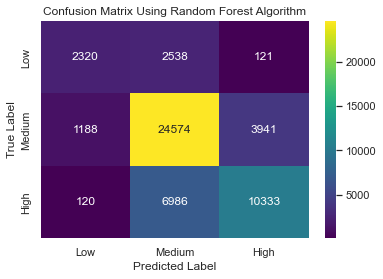

Train F1 Score (Micro) for Random Forest Algorithm is : 0.9864111665387567
Test F1 Score (Micro) for Random Forest Algorithm is : 0.7142418602866407


In [64]:
model_7 = RandomForestClassifier(random_state=0)
model_7.fit(X_train, y_train)
pred_7 = model_7.predict(X_test)
train_pred_7 = model_7.predict(X_train)

print(classification_report(y_test, pred_7))
make_confusion_matrix(pred_7, 'Random Forest')
train_score_7 = f1_score(y_train, train_pred_7, average='micro')
score_7 = f1_score(y_test, pred_7, average='micro')
print('Train F1 Score (Micro) for Random Forest Algorithm is : {}'.format(train_score_7))
print('Test F1 Score (Micro) for Random Forest Algorithm is : {}'.format(score_7))

## **Comparing Algorithm**

In [66]:
names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Linear Discriminant Analysis',
         'Naive Bayes', 'Extreme Gradient Boosting', 'Random Forest']
cv_score_f1 = [result_1, result_2, result_3, result_4, result_5, result_6, result_7]
train_score_f1 = [train_score_1, train_score_2, train_score_3, train_score_4, train_score_5, train_score_6, train_score_7]
score_f1 = [score_1, score_2, score_3, score_4, score_5, score_6, score_7]

In [67]:
compare = pd.DataFrame()
compare['Algorithm'] = names
compare['CV F1 Score'] = cv_score_f1
compare['F1 Score (Train)'] = train_score_f1
compare['F1 Score (Test)'] = score_f1
compare

,Algorithm,CV F1 Score,F1 Score (Train),F1 Score (Test)
0,Logistic Regression,0.591088,0.591515,0.594367
1,Decision Tree,0.657603,0.986421,0.659561
2,K-Nearest Neighbors,0.655962,0.766213,0.658640
3,Linear Discriminant Analysis,0.586766,0.587212,0.588323
4,Naive Bayes,0.430962,0.431183,0.433798
5,Extreme Gradient Boosting,0.727283,0.744820,0.726694
6,Random Forest,0.714558,0.986411,0.714242


Menggunakan 7 buah algoritma *Machine Learning* dengan random_state = 0, kita melihat bahwa *Random Forest Algorithm* dan *Extreme Gradient Boosting* adalah 2 algoritma yang memberikan nilai F1 Score tertinggi saat diuji di data *test* (*Valudation Data*).